In [1]:
%matplotlib notebook
from ipywidgets import *
import numpy as np
import datetime as dt

from sat_track import comp_sat
import matplotlib.pyplot as plt

In [2]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

def sat_plot(longitude, latitude):
    fig = plt.figure(figsize=(10,5))
    ax = fig.add_subplot(1, 1, 1, projection=ccrs.Robinson())

    ax.set_global()
    ax.stock_img()
    ax.coastlines()

    return ax.plot(longitude, latitude,"r", transform=ccrs.Geodetic())

In [3]:
b_star = 0.12236e-3
b_coef = .00030597
incl = 96.7217
r_asc = 108.6657
ecc = 0.0006209
arg_per = 115.0686
m_anom = 245.1232
m_motion = 15.86481001

In [4]:
timerange = np.arange(0, 86400, 60) # calculate position every 60 seconds for 1 day

In [5]:
ra, dec = comp_sat(dt.datetime.utcnow(), timerange, b_coef, b_star,
                           incl, r_asc, ecc, arg_per, m_anom, m_motion)

In [6]:
def update(incl=incl, r_asc=r_asc, arg_per=arg_per, m_anom=m_anom):
    ra, dec = comp_sat(dt.datetime.utcnow(), timerange, b_coef, b_star,
                       incl, r_asc, ecc, arg_per, m_anom, m_motion)
    line.set_ydata(dec)
    line.set_xdata(ra)

<IPython.core.display.Javascript object>


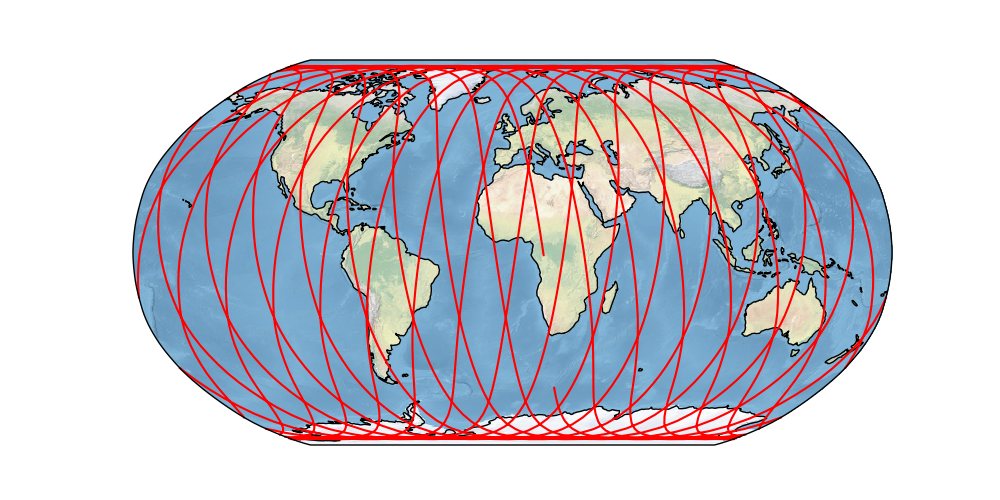

In [7]:
line, = sat_plot(ra, dec)

In [8]:
interact(update, incl=(0,180), r_asc=(0,360), arg_per=(0,360))

interactive(children=(IntSlider(value=96, description='incl', max=180), IntSlider(value=108, description='r_as…

<function __main__.update(incl=96.7217, r_asc=108.6657, arg_per=115.0686, m_anom=245.1232)>